# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

**Answer:**

Shape of $a^T x$ is 1-dimensional.

$\boldsymbol{x}$ is an n-dimensional vector.

The resulting expression is an n-dimensional vector.

- - -

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

**Answer**


\begin{align}
\frac{\partial (\boldsymbol{a}^T \boldsymbol{x})}{\partial x}  &= \frac{\partial (a_1 x_1 + a_2 x_2 + \dots + a_n x_n)} {\partial \boldsymbol{x} } \\
 &= [a_1, a_2, \dots, a_n] = \boldsymbol{a}^T
\end{align}


Where going from 1 to 2 is because the derivative in each position is with respect to $x_i$.

- - - 

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

**Answer**

We have the following for the vector
$$ 
(\boldsymbol{A}\boldsymbol{a})_i = \sum_{j} A_{i,j} a_j
$$ 
Then multiplying with the transpose this becomes
$$
a^T * \boldsymbol{A}\boldsymbol{a} = \sum_i \sum_j a_i * A_{i,j} a_j = \sum_i \sum_j a_i a_j * A_{i,j}
$$
Taking the derivative with regards to $a_k$ then becomes
$$
\sum_i a_i * A_{i,k} + \sum_j a_j * A_{k,j} = a^T (A + A^T)
$$

- - -

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**Answer**:

By taking the "point" where the growth of the function is equal to 0 we are finding a minimum of the loss between the predicted and the actual data. I.e. the best fit according to our data.

- - -

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

**Answer**:

If $\boldsymbol{X}$ is invertible that implies that $\boldsymbol{X}^{-1}$ exsist so we can multiply it on the left for both sides of the equation:

$$
\begin{aligned}
\boldsymbol{X}^{-1} \boldsymbol{X} \theta =& \boldsymbol{X}^{-1} \boldsymbol{y} \\
\theta =& \boldsymbol{X}^{-1} \boldsymbol{y}
\end{aligned}
$$

The last equality is the expression for the optimal parameters.


- - -


**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**Answer**:

Multiplying the parenthesis together we get
$$
(x^T - (As)^T)(x - As) = x^T x - x^T As - (As)^T x + (As)^T As
$$

Now we need two results to do the derivation, the first result is using that the transpose of a scaler is equal to itself:

$$ x^T A s = (x^T A s )^T = s^T A^T x$$

Secondly the result from exercise 1.c above.
$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T)
$$
which becomes the following since the transpose of $A^T A$, is equal to itself $(A^T A)^T = A^T (A^T)^T = A^T A$.
$$
\frac{\partial (\boldsymbol{a}^T(\boldsymbol{A} \boldsymbol{A^T})\boldsymbol{a})}{\partial \boldsymbol{a}} = 2 \boldsymbol{a}^T(\boldsymbol{A}^T \boldsymbol{A}),
$$

Now taking the derivative with respect to $s$ we get the result:
$$
\frac{\partial (x^T x - 2 x^T As + s^T A^T A s) } {\partial s} = 0 - 2 x^T A + 2 s^T A^T A = -2(x-As)^T A
$$


- - -

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

**Answer**

The optimal solution is when the following is true:
$$
\begin{aligned}
0 &= -2 (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\theta})^T \boldsymbol{X} \\
0 &= y^T X - \theta^T X^T X \\
\theta^T &= y^T X (X^T X) ^{-1}\\
\theta &= (X^T X)^{-1} X^T y
\end{aligned}
$$

- - -

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [1]:
import numpy as np

In [2]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [3]:
X = np.zeros((n, 3))
X[:, 0] = 1
X[:, 1] = income
X[:, 2] = children

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [4]:
def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

#beta = OLS_parameters(X, y)

## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [5]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [6]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    X[:, 0] = 1
    for i in range(1, p + 1):
        X[:, i] = x**i 
    # could this be a loop? yes
    return X

X = polynomial_features(x, 5)

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [7]:
beta = OLS_parameters(X, y)

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Test_LR = LinearRegression().fit(X_train, y_train).predict(X_test)

beta = OLS_parameters(X_train, y_train)
y_pred = X_test @ beta
mse = mean_squared_error(y_test, y_pred)
mse_LR = mean_squared_error(y_test, Test_LR)

print("Mean Squared Error:" + str(mse) + ", Linear Regression: " + str(mse_LR))


Mean Squared Error:0.02051796782777713, Linear Regression: 0.020517967827777508


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

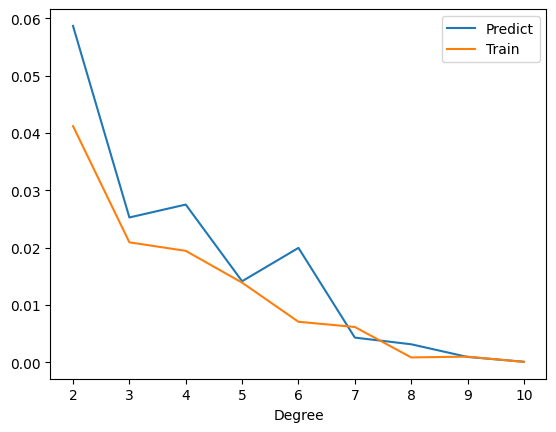

In [10]:
import matplotlib.pyplot as plt

plot_predict = []
plot_train = []
degrees = np.arange(2, 11)

for degree in degrees:
    X = polynomial_features(x, degree)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    beta = OLS_parameters(X_train, y_train)
    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    mse_predict = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    plot_predict.append(mse_predict)
    plot_train.append(mse_train)

plt.plot(degrees, plot_predict, label="Predict")
plt.plot(degrees, plot_train, label="Train")
plt.xlabel("Degree")
plt.legend()
plt.show()


**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?



The graph will necessarily becomes better the more variables we have to explain the differences in the data, though this will also increase the likelihood of it overfitting to the training data.
The data we are seeing here seems to say that the model hasn't overfitted to the data yet.
Meaning we are gaining some extra explainability through the extra degrees.
We might see with further analysis that an exponential model would be better than a polynomial model.

We also see that, since we have few datapoints here, there are times where the predictions on the test set are better than the data it has been minimized on. Though this becomes less likely the more degrees of freedom we have.  

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_library = PolynomialFeatures(degree=10).fit_transform(x.reshape(-1, 1))
poly_personal = polynomial_features(x, 10)

DifferenceFunctions = poly_library - poly_personal

print(DifferenceFunctions[10:15,:])


np.allclose(poly_library, poly_personal)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.09494702e-13]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.68434189e-14
  -2.27373675e-13  4.54747351e-13 -9.09494702e-13]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77635684e-15
  -3.55271368e-15  7.10542736e-15 -2.84217094e-14  5.68434189e-14
  -1.13686838e-13  2.27373675e-13 -4.54747351e-13]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77635684e-15
  -3.55271368e-15  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.77635684e-15
  -3.55271368e-15  7.10542736e-15 -1.42108547e-14  2.84217094e-14
  -5.68434189e-14  1.13686838e-13 -4.54747351e-13]]


True

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [12]:
beta_personal = OLS_parameters(X_train, y_train)

beta_library = LinearRegression(fit_intercept=False).fit(X_train, y_train).coef_


DifferenceFunctions = beta_personal- beta_library

print(DifferenceFunctions)


print(np.allclose(beta_personal, beta_library))

[-7.54831753e-11 -7.88377696e-12 -5.18219911e-11  7.78527243e-12
  7.38536454e-11 -2.70966583e-12 -2.43485787e-11  3.82491781e-13
  3.17554490e-12 -1.83307146e-14 -1.44295817e-13]
True
